In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys


In [3]:
data = pd.read_csv("/content/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

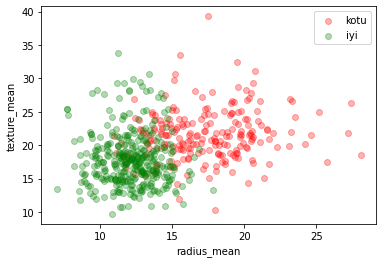

In [6]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [7]:
data.shape

(569, 31)

In [9]:
data.shape[0] #row sayısı

569

In [11]:
data.shape[1] #column sayısı

31

In [12]:
data.isnull().sum() #null değer var mı bakılır

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
x_data = data.drop(["diagnosis"],axis=1)
y = data.diagnosis.values

In [14]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [15]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
print("score: ", dt.score(x_test,y_test))

score:  0.935672514619883


In [18]:
y_pred = dt.predict(x_test)  
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[104,   4],
       [  7,  56]])

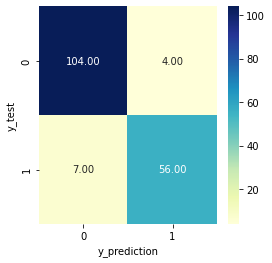

In [23]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



**COMPARISON OF ALGORITHMS ALL TOGETHER**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors= 5)
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC(C=1)

In [27]:
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
logreg.fit(x_train,y_train)
svm.fit(x_train,y_train)
nb.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred_dt = dt.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_logreg = logreg.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_nb = nb.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_knn = accuracy_score(y_test,y_pred_knn)
acc_logreg = accuracy_score(y_test,y_pred_logreg)
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_nb = accuracy_score(y_test,y_pred_nb)

In [35]:
print("Accuracy Score of Decision Tree : ",acc_dt)
print("Accuracy Score of KNN : ",acc_knn)
print("Accuracy Score of Logistic Regression : ",acc_logreg)
print("Accuracy Score of SVM : ",acc_svm)
print("Accuracy Score of Naive Bayes : ",acc_nb)

Accuracy Score of Decision Tree :  0.9181286549707602
Accuracy Score of KNN :  0.9590643274853801
Accuracy Score of Logistic Regression :  0.9649122807017544
Accuracy Score of SVM :  0.9649122807017544
Accuracy Score of Naive Bayes :  0.935672514619883
